# Data Analysis

In [3]:
# import libraries

import yfinance as yf 
from datetime import datetime

In [5]:
# current date
end = datetime.now()

# last 10 years data
start = datetime(end.year - 20, end.month, end.day)

In [7]:
# getting stock data
stock = "GOOG"
data = yf.download(stock, start = start, end = end)

[*********************100%%**********************]  1 of 1 completed


In [8]:
# showing first 5 rows
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-24,4.699635,4.715575,4.491166,4.501129,4.485013,563010421
2005-01-25,4.531515,4.538987,4.390792,4.411465,4.395671,427966132
2005-01-26,4.465014,4.717567,4.462025,4.713333,4.696458,494161321
2005-01-27,4.701378,4.703869,4.612710,4.684442,4.667671,266089645
2005-01-28,4.732760,4.849324,4.641104,4.740731,4.723758,490158373


In [9]:
# columns X Rows
data.shape

(5031, 6)

In [10]:
# shows info
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000,5.031000e+03
mean,49.171120,49.690666,48.680005,49.192301,49.027712,1.080099e+08
std,47.060890,47.584668,46.597097,47.091064,46.954137,1.414124e+08
min,4.366135,4.443345,4.298140,4.358414,4.342811,1.584340e+05
25%,13.411854,13.547595,13.266648,13.402016,13.354034,2.647220e+07
50%,28.343512,28.575891,28.053478,28.280355,28.179106,4.993045e+07
75%,65.315750,65.875000,64.928249,65.570747,65.335991,1.315954e+08
max,200.509995,203.839996,199.440002,199.630005,199.630005,1.650833e+09


In [11]:
# checking the type of the dataset, seeing if theres any string values to convert 
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5031 entries, 2005-01-24 to 2025-01-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5031 non-null   float64
 1   High       5031 non-null   float64
 2   Low        5031 non-null   float64
 3   Close      5031 non-null   float64
 4   Adj Close  5031 non-null   float64
 5   Volume     5031 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.1 KB


In [12]:
# checking for null values
data.isna()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-24,False,False,False,False,False,False
2005-01-25,False,False,False,False,False,False
2005-01-26,False,False,False,False,False,False
2005-01-27,False,False,False,False,False,False
2005-01-28,False,False,False,False,False,False
...,...,...,...,...,...,...
2025-01-14,False,False,False,False,False,False
2025-01-15,False,False,False,False,False,False
2025-01-16,False,False,False,False,False,False


In [19]:
# adding up all the null values and seeing if it comes to 0 or not
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [21]:
# data doesn't have any missing values

In [23]:
# import for plotting
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Close Price of Google Stock Over Time')

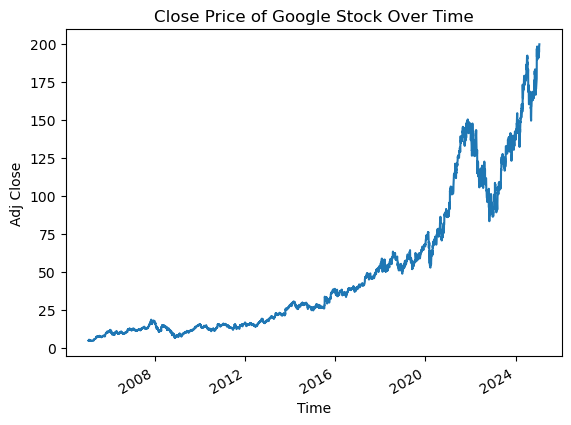

In [29]:
plt.figure()
data["Adj Close"].plot()
plt.xlabel("Time")
plt.ylabel("Adj Close")
plt.title("Close Price of Google Stock Over Time")

In [31]:
# creating a function for plotting
def plot_graph(figsize, metric, column_name):
    plt.figure(figsize = figsize)
    metric.plot()
    plt.xlabel("Time")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google Stock Over Time")

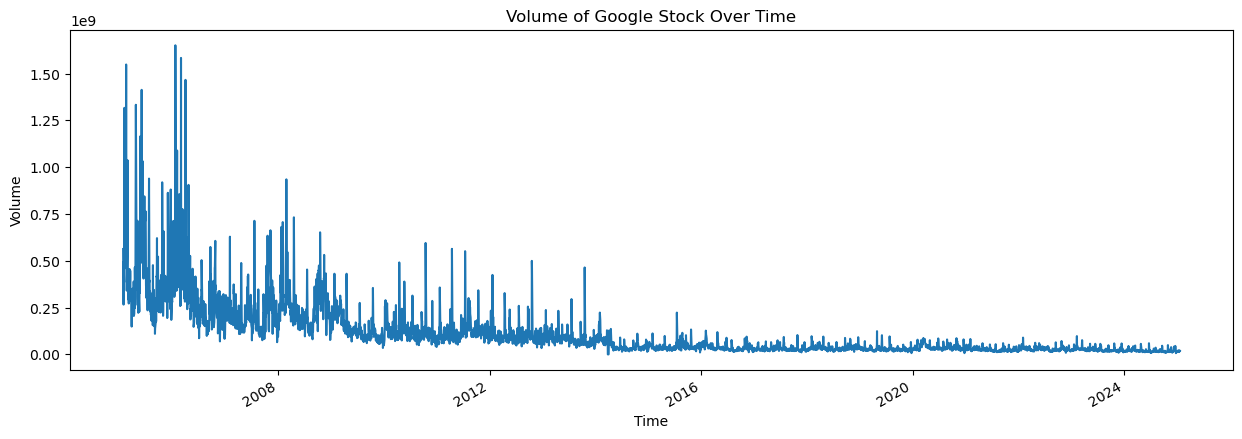

In [33]:
plot_graph((15, 5), data["Volume"], "Volume")

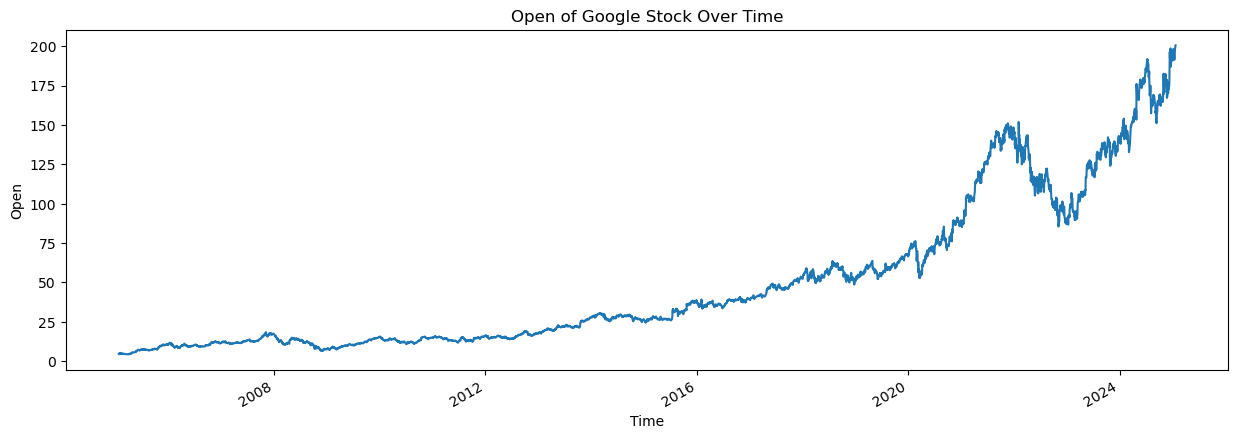

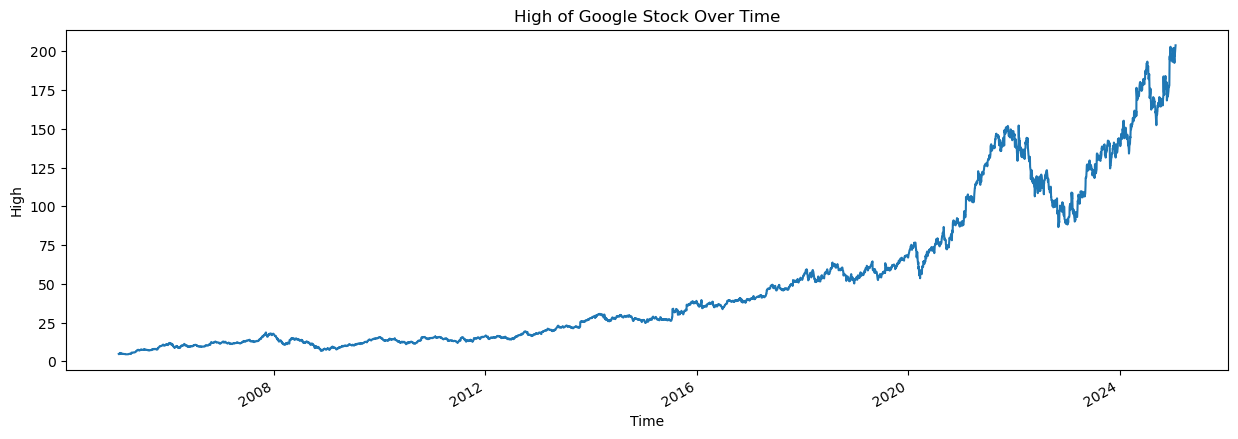

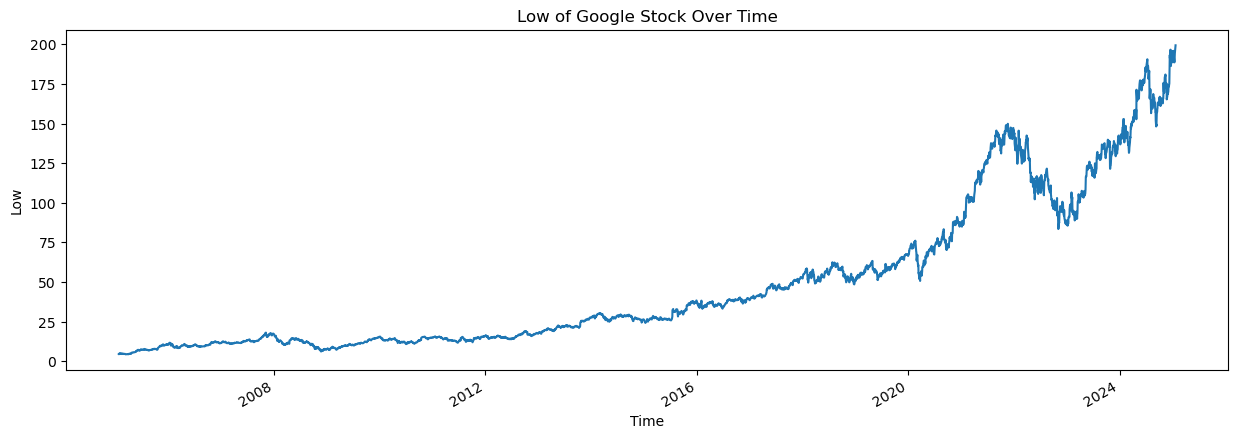

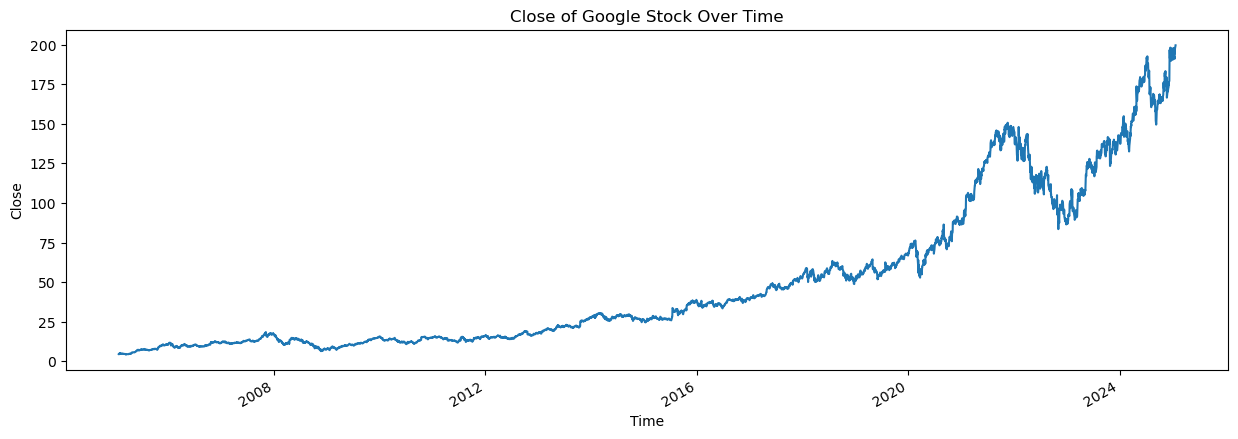

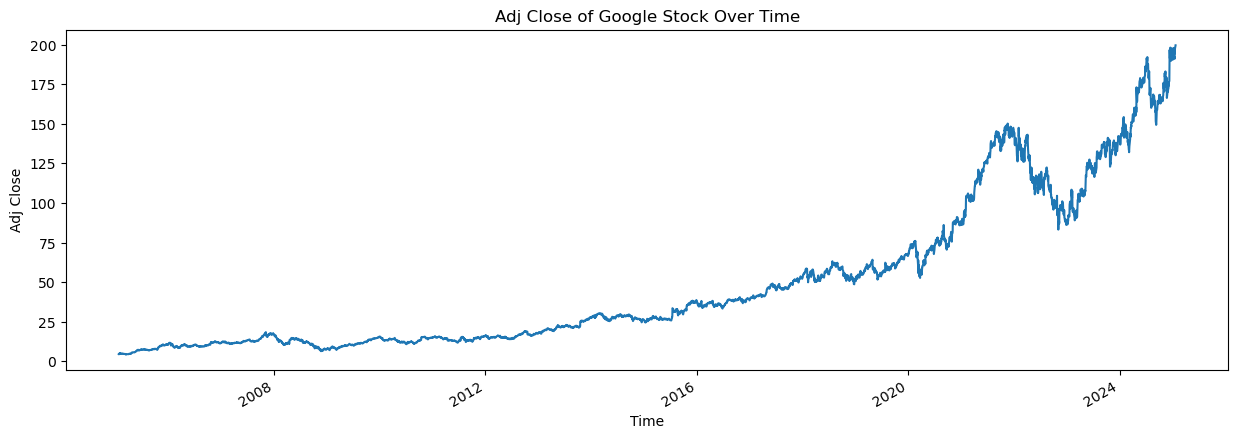

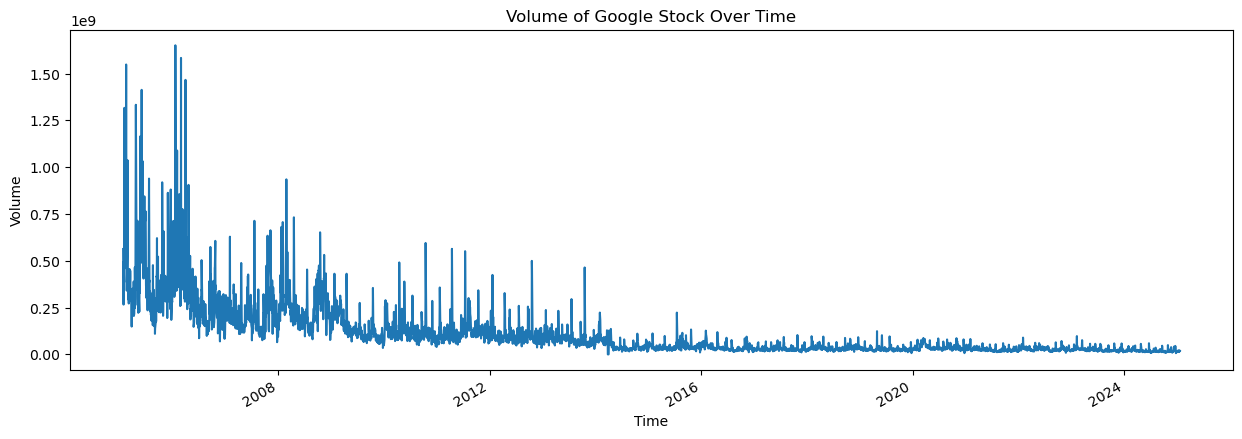

In [34]:
# print the graph for all the column metrics
for i in data.columns:
    plot_graph((15, 5), data[i], i)

In [36]:
import pandas as pd

In [39]:
values = {}
for i in range(2015, 2025):
    values[i] = list(data.index.year).count(i)
print(values)

{2015: 252, 2016: 252, 2017: 251, 2018: 251, 2019: 252, 2020: 253, 2021: 252, 2022: 251, 2023: 250, 2024: 252}


In [41]:
values = pd.DataFrame(values.items(), columns=("year", "No.of Days"))

In [43]:
values

,year,No.of Days
0,2015,252
1,2016,252
2,2017,251
3,2018,251
4,2019,252
5,2020,253
6,2021,252
7,2022,251
8,2023,250
9,2024,252


In [45]:
(values["No.of Days"].mean()).round()

252.0

In [47]:
data["Moving Average for 250 days"] = data["Adj Close"].rolling(250).mean()
data["Moving Average for 100 days"] = data["Adj Close"].rolling(100).mean()

In [49]:
data

,Open,High,Low,Close,Adj Close,Volume,Moving Average for 250 days,Moving Average for 100 days
Date,,,,,,,,
2005-01-24,4.699635,4.715575,4.491166,4.501129,4.485013,563010421,NaN,NaN
2005-01-25,4.531515,4.538987,4.390792,4.411465,4.395671,427966132,NaN,NaN
2005-01-26,4.465014,4.717567,4.462025,4.713333,4.696458,494161321,NaN,NaN
2005-01-27,4.701378,4.703869,4.612710,4.684442,4.667671,266089645,NaN,NaN
2005-01-28,4.732760,4.849324,4.641104,4.740731,4.723758,490158373,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-14,192.500000,193.270004,189.639999,191.050003,191.050003,13651200,166.764673,173.440378
2025-01-15,194.350006,197.800003,193.330002,196.979996,196.979996,12894900,166.983079,173.737979
2025-01-16,195.824997,196.979996,194.300003,194.410004,194.410004,13449600,167.182836,174.031228


<Axes: xlabel='Date'>

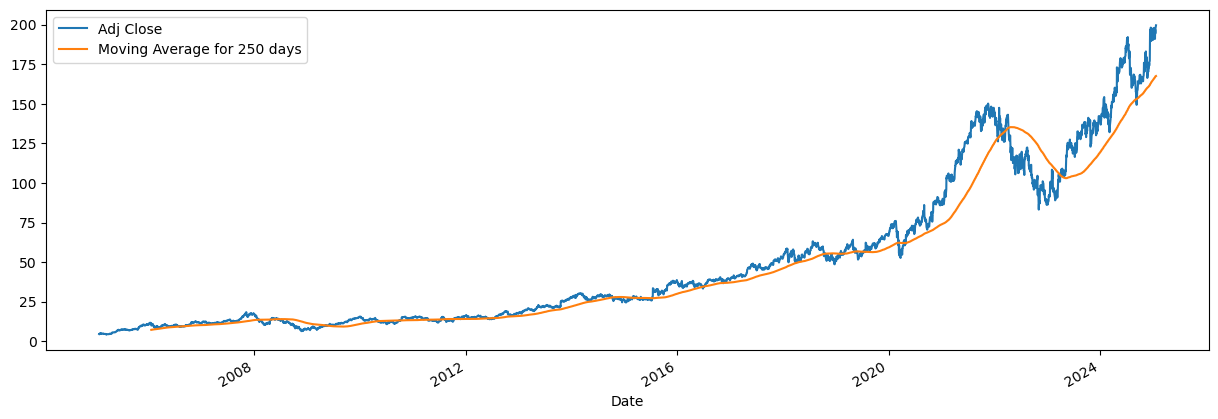

In [51]:
data[["Adj Close", "Moving Average for 250 days"]].plot(figsize = (15, 5))

<Axes: xlabel='Date'>

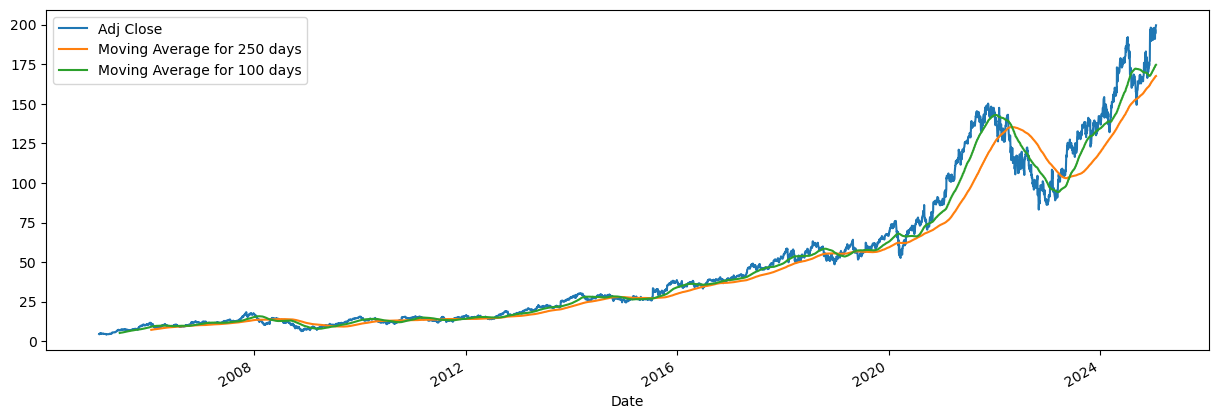

In [53]:
data[["Adj Close", "Moving Average for 250 days", "Moving Average for 100 days"]].plot(figsize = (15, 5))

In [55]:
data["Adj Close percentage Change"] = data["Adj Close"].pct_change()

In [57]:
data[["Adj Close", "Adj Close percentage Change"]].head()

,Adj Close,Adj Close percentage Change
Date,,
2005-01-24,4.485013,NaN
2005-01-25,4.395671,-0.019920
2005-01-26,4.696458,0.068428
2005-01-27,4.667671,-0.006130
2005-01-28,4.723758,0.012016


<Axes: xlabel='Date'>

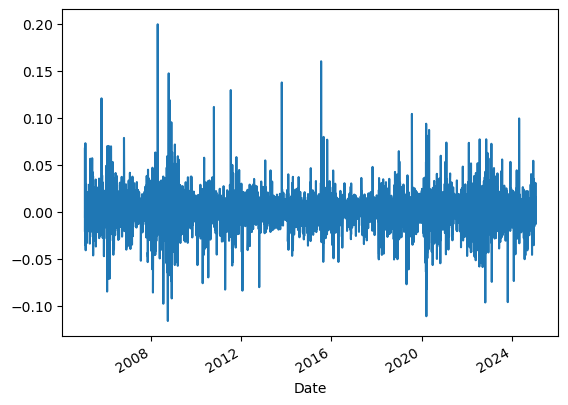

In [59]:
data["Adj Close percentage Change"].plot()

# Preprocessing data

In [62]:
adj_close = data[["Adj Close"]]
adj_close.head()

,Adj Close
Date,
2005-01-24,4.485013
2005-01-25,4.395671
2005-01-26,4.696458
2005-01-27,4.667671
2005-01-28,4.723758


In [64]:
max(adj_close), min(adj_close)

('Adj Close', 'Adj Close')

In [68]:
# normalizing our closed price data
# putting all the values between the range of 0 to 1 for the ML Model to train them easily

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(adj_close)
scaled_data

array([[7.28172959e-04],
       [2.70679602e-04],
       [1.81091090e-03],
       ...,
       [9.73270130e-01],
       [9.89349011e-01],
       [1.00000000e+00]])

In [72]:
print(len(adj_close))
print(len(scaled_data))

5031
5031


In [76]:
# creating a dataset
# we are going to use the values of 1 to 100 to predict the 101 value
# # we are going to use the values of 2 to 101 to predict the 102 value
x_data = []
y_data = []


for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

In [78]:
import numpy as np

In [80]:
x_data, y_data = np.array(x_data), np.array(y_data)

In [82]:
# for every 100 values we will predict the next value
x_data[0], y_data[0]

(array([[7.28172959e-04],
        [2.70679602e-04],
        [1.81091090e-03],
        [1.66349922e-03],
        [1.95070196e-03],
        [2.62169710e-03],
        [2.14895030e-03],
        [3.93571989e-03],
        [4.55842265e-03],
        [3.73239033e-03],
        [2.67379370e-03],
        [3.00548218e-03],
        [2.10828586e-03],
        [1.65079006e-03],
        [1.57707933e-03],
        [2.28746923e-03],
        [2.57213258e-03],
        [2.97625232e-03],
        [2.91144168e-03],
        [2.91779504e-03],
        [2.08159294e-03],
        [2.40946990e-03],
        [1.76643248e-03],
        [1.38264496e-03],
        [1.65205975e-03],
        [1.40678872e-03],
        [1.29496026e-03],
        [1.52751725e-03],
        [1.38645649e-03],
        [1.75626515e-03],
        [1.29749721e-03],
        [8.08234602e-04],
        [6.34132455e-04],
        [3.57094607e-04],
        [0.00000000e+00],
        [4.60032749e-04],
        [7.75173678e-05],
        [5.46445312e-04],
        [6.4

In [84]:
# taking 70% for training 
# taking 30% for testing

int(len(x_data)*0.7)

3451

In [86]:
5032-100-int(len(x_data)*0.7)

1481

In [88]:
splittin_length = int(len(x_data)*0.7)

x_train = x_data[:splittin_length]
y_train = y_data[:splittin_length]

x_test= x_data[splittin_length:]
y_test= y_data[splittin_length:]

In [90]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3451, 100, 1)
(3451, 1)
(1480, 100, 1)
(1480, 1)


# Neural Networks

In [93]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [94]:
(x_train.shape[1],1)

(100, 1)

In [97]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [99]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [101]:
model.fit(x_train, y_train, batch_size= 1, epochs=2)

Epoch 1/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 126s 36ms/step - loss: 2.7340e-04
Epoch 2/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 126s 36ms/step - loss: 3.9561e-05


In [105]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [107]:
predicitions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step


In [109]:
predicitions

array([[0.27349487],
       [0.27650306],
       [0.2773207 ],
       ...,
       [0.92805696],
       [0.93056715],
       [0.9385629 ]], dtype=float32)

In [111]:
inv_predictions = scaler.inverse_transform(predicitions)
inv_predictions

array([[ 57.752857],
       [ 58.340317],
       [ 58.499996],
       ...,
       [185.58044 ],
       [186.07066 ],
       [187.63213 ]], dtype=float32)

In [120]:
y_inv = scaler.inverse_transform(y_test) 
y_inv

array([[ 57.89348984],
       [ 57.68572998],
       [ 56.96033859],
       ...,
       [194.41000366],
       [197.55000305],
       [199.63000488]])

In [122]:
rmse = np.sqrt(np.mean((inv_predictions - y_inv)**2))

In [124]:
rmse

3.765275043572112

In [138]:
data.index[splittin_length+100:]

DatetimeIndex(['2019-03-05', '2019-03-06', '2019-03-07', '2019-03-08',
               '2019-03-11', '2019-03-12', '2019-03-13', '2019-03-14',
               '2019-03-15', '2019-03-18',
               ...
               '2025-01-06', '2025-01-07', '2025-01-08', '2025-01-10',
               '2025-01-13', '2025-01-14', '2025-01-15', '2025-01-16',
               '2025-01-17', '2025-01-21'],
              dtype='datetime64[ns]', name='Date', length=1480, freq=None)

In [142]:
plotting_data = pd.DataFrame(
    
    {
        
        "original_test_data": y_inv.reshape(-1),
        "predictions": inv_predictions.reshape(-1)
        
    }, 
    
    index= data.index[splittin_length+100:]


    
)

plotting_data

,original_test_data,predictions
Date,,
2019-03-05,57.893490,57.752857
2019-03-06,57.685730,58.340317
2019-03-07,56.960339,58.499996
2019-03-08,56.911514,58.099602
2019-03-11,58.577522,57.760532
...,...,...
2025-01-14,191.050003,184.106857
2025-01-15,196.979996,182.889420
2025-01-16,194.410004,185.580444


In [152]:
plotting_data = plotting_data.join(data["Adj Close"])

In [154]:
plotting_data

,original_test_data,predictions,Adj Close
Date,,,
2019-03-05,57.893490,57.752857,57.893490
2019-03-06,57.685730,58.340317,57.685730
2019-03-07,56.960339,58.499996,56.960339
2019-03-08,56.911514,58.099602,56.911514
2019-03-11,58.577522,57.760532,58.577522
...,...,...,...
2025-01-14,191.050003,184.106857,191.050003
2025-01-15,196.979996,182.889420,196.979996
2025-01-16,194.410004,185.580444,194.410004


<Axes: xlabel='Date'>

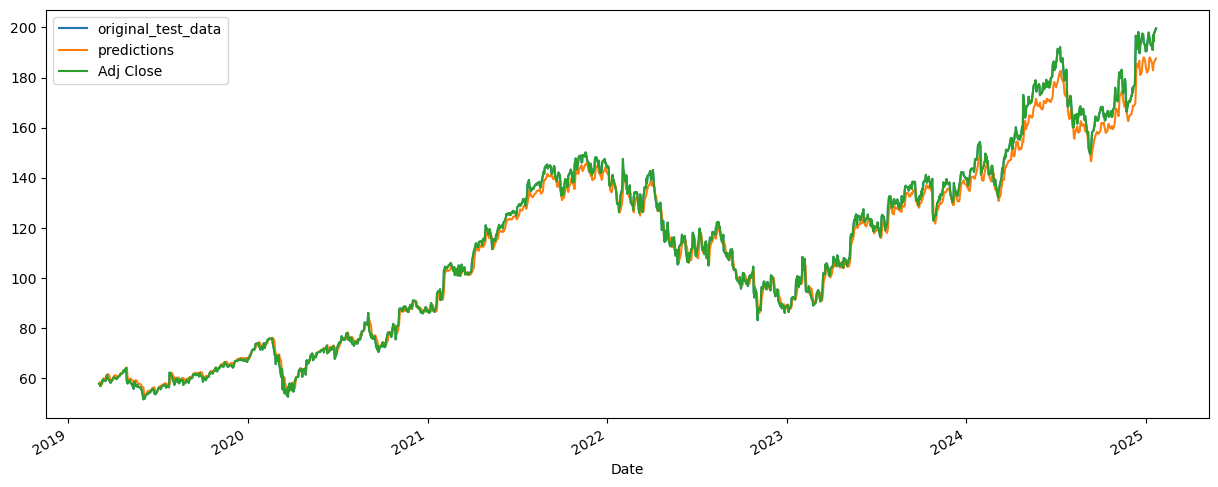

In [156]:
plotting_data.plot(figsize = (15,6))